# Understanding Joint Probability Spaces
The JPS contains everything that is knowable from the data alone

1. Univariate Probabilities
2. Joint Probabilities
3. Conditional Probabilities

### The HPCC Causality Toolkit
- Because (Python)
- HPCC_Causality (ECL)

## Synthetic Dataset
- 8 Variables
- 6305 Possible Queries

In [3]:
%matplotlib widget
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import warnings
warnings.filterwarnings("ignore")
from because.synth import gen_data
from because.probability.prob import ProbSpace
from because.visualization import viz
from because.synth import read_data

In [83]:

MOD = ['X1', 'X2', 'X3', 'X4', 'Y1', 'Y2', 'Y3', 'Y4']
SEM = [
        # Bimodal logistic - logistic mixture
        'X1 = logistic(-2,1) if choice([0,1]) else logistic(3,.75)',
        # Trimodal logistic distribution
        'X2 = logistic(-2, .3) if choice([0, 0, 1]) else logistic(0, .3) if choice([0, 1]) else logistic(3, .3)',
        # Bimodal logistic - normal mixture
        'X3 = truncated("logistic(1,1) if choice([0,0, 1]) else normal(1.2,.75)", -1, 3)',
        # Half-normal distribution
        'X4 = truncated("abs(normal(1,1))", 0, None)',

        # Non-linear functions of Xn variables
        'f1 = math.tanh(X1 + 1)',
        'f2 = math.sin(X2)',
        'f3 = -math.tanh(X3 - 2)',
        'f4 = X4**1.1',
        # A list of all the non-linearities
        'Fs = [f1, f2, f3, f4]',
        # Combinations 
        'Y1 = sum(Fs[:1]) + logistic(0,.5)',
        'Y2 = sum(Fs[:2]) / 2.0 + logistic(0,.5)',
        'Y3 = sum(Fs[:3]) / 3.0 + logistic(0,.5)',
        'Y4 = sum(Fs[:4]) / 4.0 + logistic(0,.5)',
      ]

gen = gen_data.Gen(sem=SEM, mod=MOD)
ds = gen.getDataset(100000)
ps = ProbSpace(ds)


### Variable Overviews (Univariate PDFs)

Viz.show: Target =  [('X1',), ('X2',), ('X3',), ('X4',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  None
vars =  ['X1', 'X2', 'X3', 'X4']


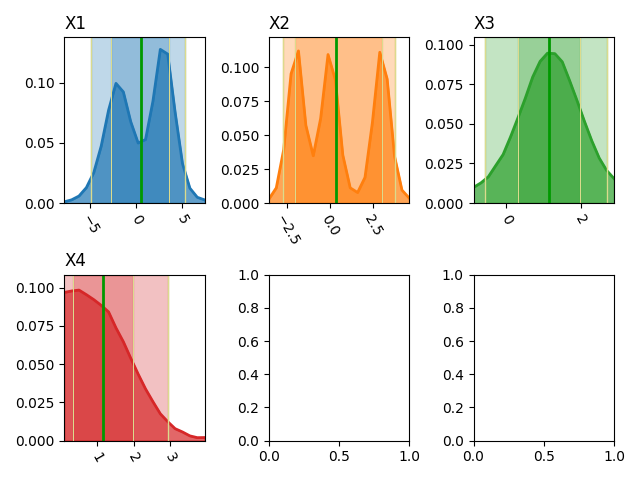

In [77]:
viz.show(probspace=ps, targetSpec=['X1', 'X2', 'X3', 'X4'],
         condSpec=[], filtSpec=[], gtype='multi')

Viz.show: Target =  [('Y1',), ('Y2',), ('Y3',), ('Y4',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  None
vars =  ['Y1', 'Y2', 'Y3', 'Y4']


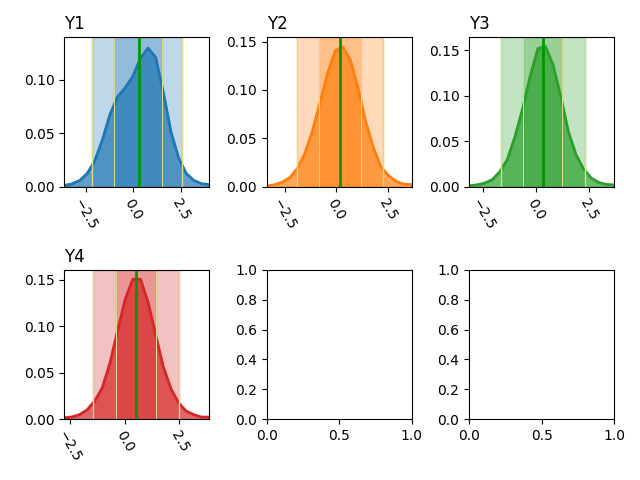

In [76]:
viz.show(probspace=ps, targetSpec=['Y1', 'Y2', 'Y3', 'Y4'],
         condSpec=[], filtSpec=[], gtype='multi')

Viz.show: Target =  [('Y1',)] , Condition =  []
Viz.show: Showing graph =  Univariate Probability Distribution plot. , power =  None
Test Limit =  0.1 percentile to 99.9 percentile.


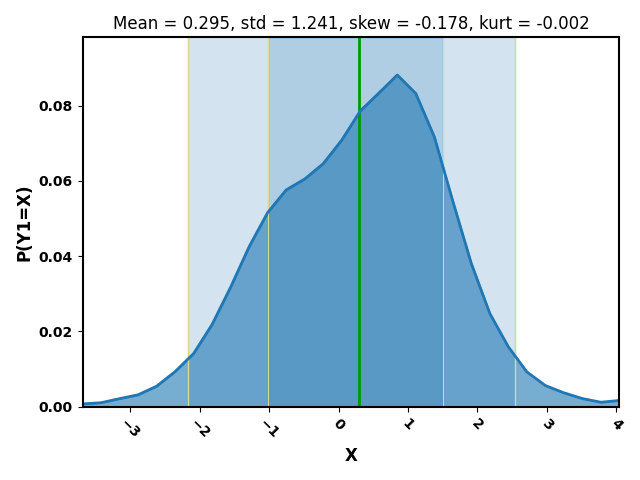

In [74]:
viz.show(probspace=ps, targetSpec=['Y1'],
         condSpec=[], filtSpec=[], gtype='pdf')

### Inter-variable Relationship Overview
1. Correlation Heatmap
2. Dependence Heatmap

Viz.show: Target =  [('X1',), ('X2',), ('X3',), ('X4',), ('Y1',), ('Y2',), ('Y3',), ('Y4',)] , Condition =  []
Viz.show: Showing graph =  Variable Dependence Heatmap , power =  0
Heatmap.show: Showing Correlation Coefficients (power=0).
  Positive values indicate positive correlation.
  Negative values indicate negative correlation.  Zero indicate no correlation.


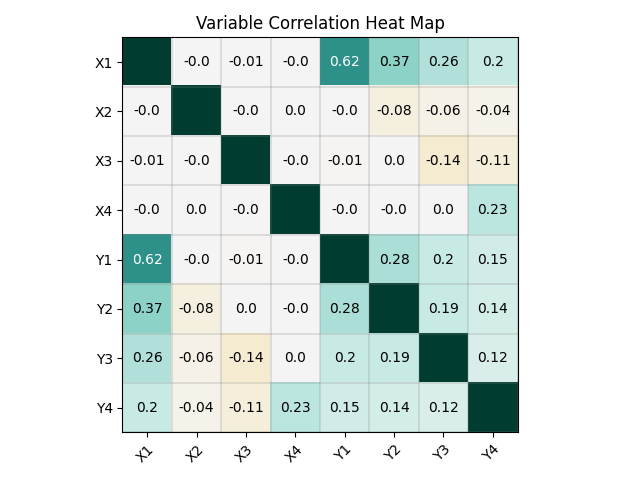

In [60]:
viz.show(probspace=ps, targetSpec=['X1', 'X2', 'X3', 'X4', 'Y1', 'Y2', 'Y3', 'Y4'],
         condSpec=[], filtSpec=[], gtype='hmap', power=0)

Viz.show: Target =  [('X1',), ('X2',), ('X3',), ('X4',), ('Y1',), ('Y2',), ('Y3',), ('Y4',)] , Condition =  []
Viz.show: Showing graph =  Variable Dependence Heatmap , power =  5
Heatmap.show: Showing dependence between variables with sensitivity =  5 .
  Values near 1.0 indicate strong dependence.  Values near 0.0 indicate strong independence.
  Values near .5 are indeterminate.


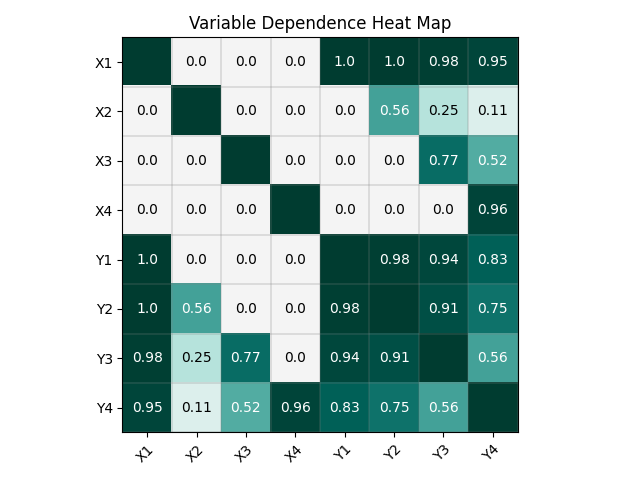

In [61]:
viz.show(probspace=ps, targetSpec=['X1', 'X2', 'X3', 'X4', 'Y1', 'Y2', 'Y3', 'Y4'],
         condSpec=[], filtSpec=[], gtype='hmap', power=5)

### Joint Distributions of two variables

Viz.show: Target =  [('X1',), ('X3',)] , Condition =  []
Viz.show: Showing graph =  2-variable Probability Distribution plot. , power =  None
Controlling for:  [] , power =  None
Test Time =  62.519


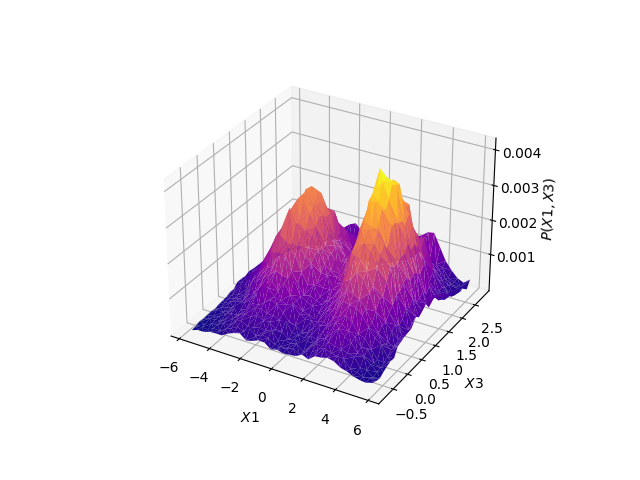

In [39]:
viz.show(probspace=ps, targetSpec=['X1', 'X3'],
         condSpec=[], filtSpec=[], gtype='pdf')

Viz.show: Target =  [('X1',), ('Y2',)] , Condition =  []
Viz.show: Showing graph =  2-variable Probability Distribution plot. , power =  None
Controlling for:  [] , power =  None
Test Time =  63.428


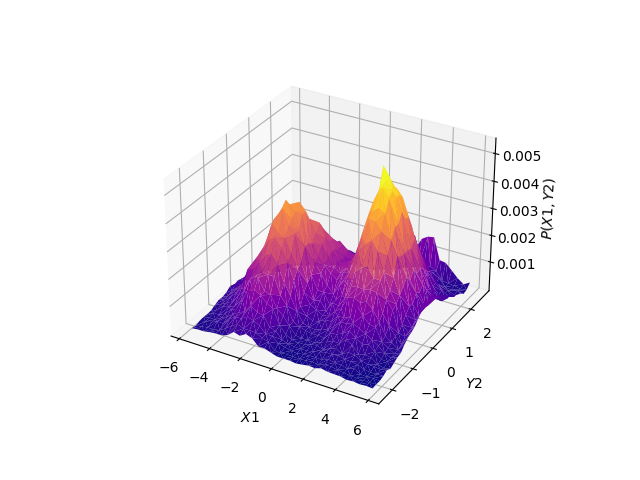

In [40]:
viz.show(probspace=ps, targetSpec=['X1', 'Y2'],
         condSpec=[], filtSpec=[], gtype='pdf')

### Conditional Probabilities

Viz.show: Target =  [('Y1',)] , Condition =  [('X1',)]
Viz.show: Showing graph =  2-variable Probability Distribution plot. , power =  None
Controlling for:  [] , power =  None
Test Time =  73.915


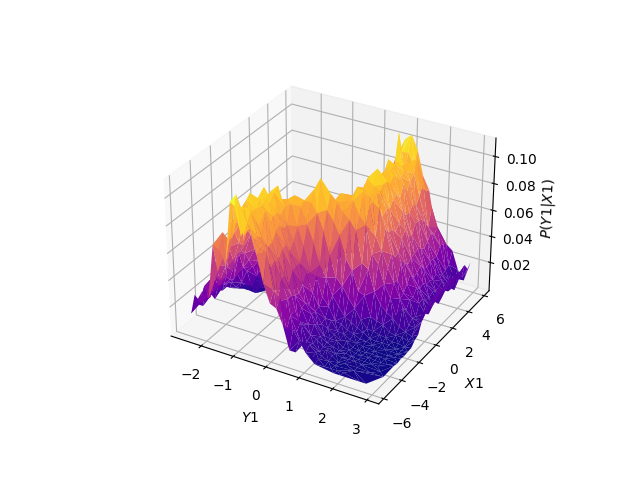

In [59]:
viz.show(probspace=ps, targetSpec=['Y1'],
         condSpec=['X1'], filtSpec=[], gtype='pdf')



Viz.show: Target =  [('Y1',)] , Condition =  [('X1',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  30
Elapsed Time =  4.573


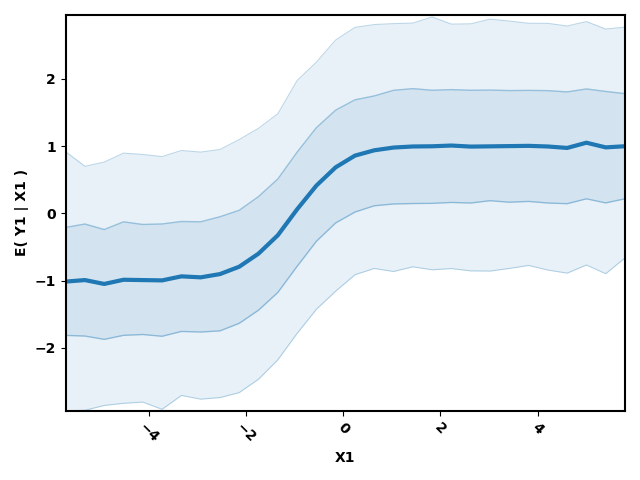

In [62]:
viz.show(probspace=ps, targetSpec=['Y1'],
         condSpec=['X1'], filtSpec=[], gtype='exp')

Viz.show: Target =  [('Y2',)] , Condition =  [('X1',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  30
Elapsed Time =  4.898


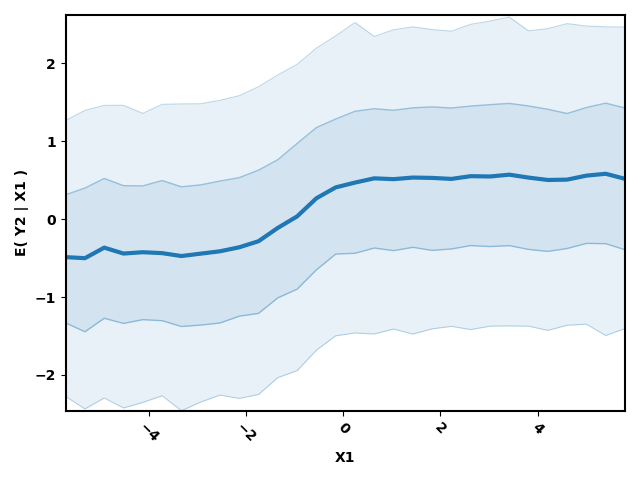

In [63]:
viz.show(probspace=ps, targetSpec=['Y2'],
         condSpec=['X1'], filtSpec=[], gtype='exp')

Viz.show: Target =  [('Y2',)] , Condition =  [('X2',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  10
Viz.show: Controlling for  ['X1']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  30
Elapsed Time =  108.746


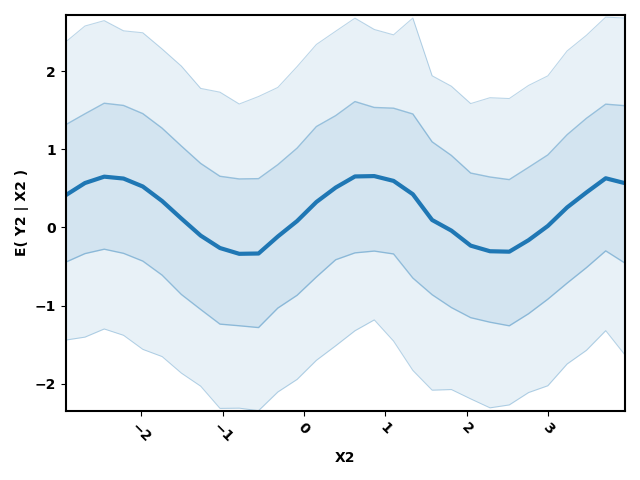

In [65]:
viz.show(probspace=ps, targetSpec=['Y2'],
         condSpec=['X2'], controlFor=[], filtSpec=[], gtype='exp', power=10)

### Conditional Probability of Independent Variables

Viz.show: Target =  [('X2',)] , Condition =  [('X1',)]
Viz.show: Showing graph =  2-variable Probability Distribution plot. , power =  None
Controlling for:  [] , power =  None
Test Time =  69.83


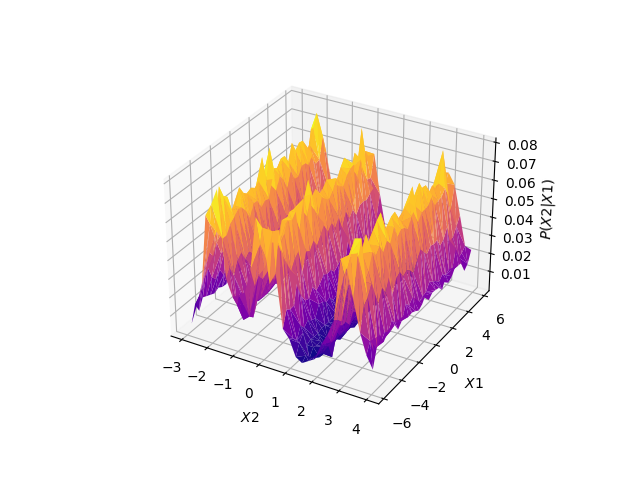

In [41]:
viz.show(probspace=ps, targetSpec=['X2'],
         condSpec=['X1'], filtSpec=[], gtype='pdf')

### Conditioning on Two Variables

Viz.show: Target =  [('Y2',)] , Condition =  [('X1',), ('X2',)]
Viz.show: Showing graph =  3D Expected value plot with two conditions , power =  None
numPts =  30
nTests =  900
Test Time =  174.83


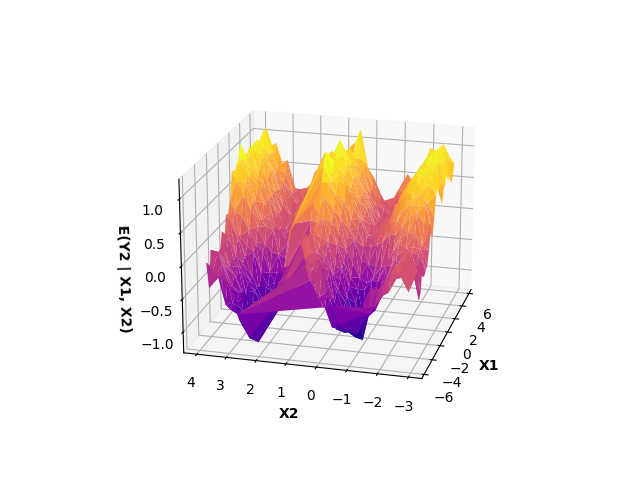

In [66]:
viz.show(probspace=ps, targetSpec=['Y2'],
         condSpec=['X1', 'X2'], filtSpec=[], gtype='exp', enhance=True)

### Causal Relationship Model

Map = 
   X1 --> Y1 ( 0.623 )
   X1 --> Y2 ( 0.372 )
   X1 --> Y3 ( 0.267 )
   X1 --> Y4 ( 0.202 )
   X2 --> Y4 ( 0.085 )
   X2 --> Y2 ( 0.157 )
   X2 --> Y3 ( 0.113 )
   X3 --> Y3 ( -0.145 )
   X3 --> Y4 ( -0.108 )
   X4 --> Y4 ( 0.233 )
   Y4 --> X2 ( 0.085 )


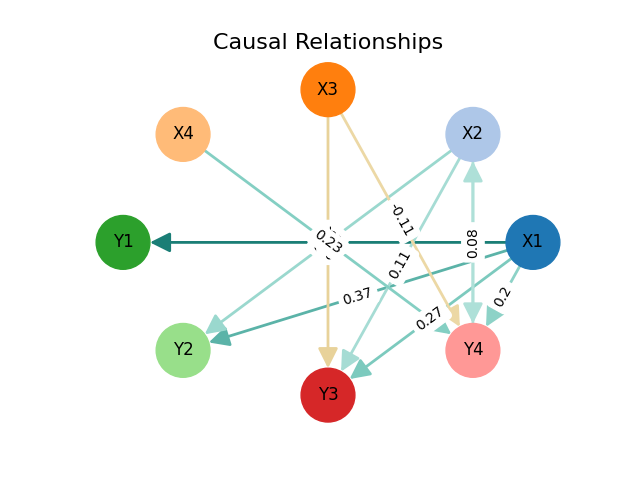

In [84]:
from because.visualization import cmodel
cmodel.show(probspace=ps, targetSpec=[], power=5, verbosity=1, maxLevel=2, sensitivity=7.8, edgeLabels='mde')

**-------------------------------------------------------------------------------------------------**










## Live Data -- CDC Behavioral Risk Factor Surveillance (BRFSS) 2020 Dataset
- 400,000 records
- 32 Variables out of 279 in CDC survey
- 1.8 quadrillon probability queries



**-------------------------------------------------------------------------------------------------**

In [4]:
import string

r = read_data.Reader('/home/roger/Datasets/llcp.csv')
ds = r.read()


ps0 = ProbSpace(ds, power=5)
ps2 = ps0.SubSpace([('income', 0,9),('education',1,2,3,4,5,6), ('smokertype',1,2,3,4),('othercancer','yes','no'),
                   ('skincancer', 'yes','no'), ('diabetes', 'yes','no'), ('asthma', 'yes', 'no'), ('copd','yes','no'), ('arthritis','yes','no'), 
                   ('kidneydis','yes','no'), ('depression','yes','no'), ('veteran','yes', 'no')], power=5)

print('N = ', ps2.N)
print('Variables = ', ps2.getVarNames())

getData:  290759 records read.
N =  285103
Variables =  ['age', 'gender', 'weight', 'height', 'ageGroup', 'genhealth', 'asthma_ever', 'asthma', 'skincancer', 'othercancer', 'copd', 'arthritis', 'depression', 'kidneydis', 'diabetes', 'maritaldetail', 'married', 'education', 'veteran', 'income', 'state', 'childcnt', 'sleephours', 'employment', 'smokertype', 'physicalactivity', 'insurance', 'checkup', 'nohospitalcost', 'bmi', 'bmicat', 'drinks']


### General Survey

Viz.show: Target =  [('age',), ('gender',), ('height',), ('weight',), ('bmi',), ('veteran',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  None
vars =  ['age', 'gender', 'height', 'weight', 'bmi', 'veteran']


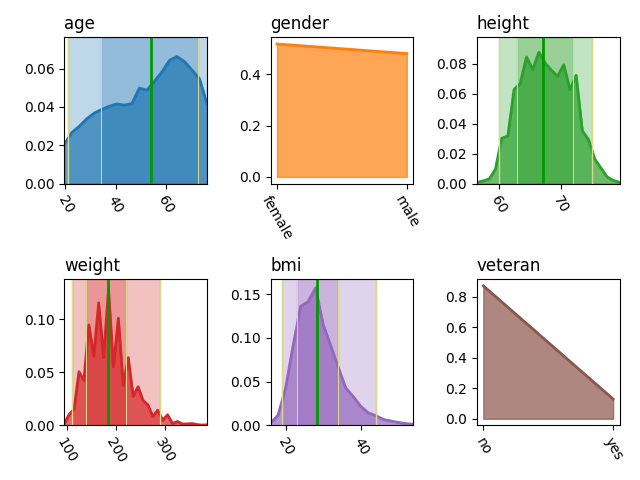

Viz.show: Target =  [('smokertype',), ('physicalactivity',), ('income',), ('education',), ('genhealth',), ('state',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  None
vars =  ['smokertype', 'physicalactivity', 'income', 'education', 'genhealth', 'state']


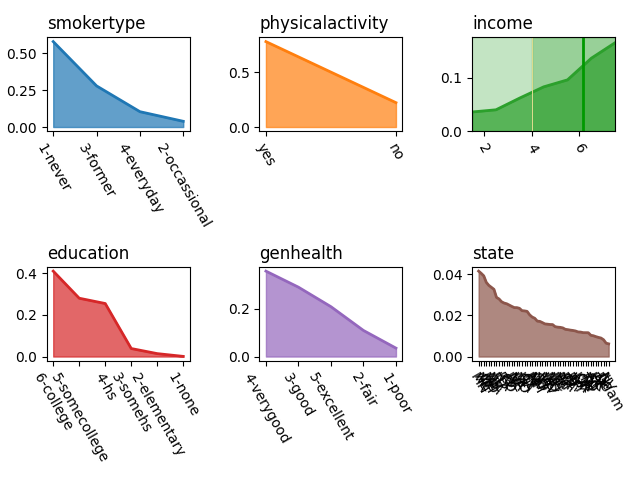

In [11]:
viz.show(probspace=ps2, targetSpec=['age', 'gender', 'height', 'weight', 'bmi', 'veteran'], condSpec=[], filtSpec=[], gtype='multi', enhance=True)
viz.show(probspace=ps2, targetSpec=['smokertype', 'physicalactivity', 'income', 'education', 'genhealth', 'state'],
                 condSpec=[], filtSpec=[], gtype='multi', enhance=True)

### Inter-variable Relationships

Viz.show: Target =  [('age',), ('gender',), ('height',), ('weight',), ('bmi',), ('veteran',), ('smokertype',), ('physicalactivity',), ('income',), ('education',), ('genhealth',)] , Condition =  []
Viz.show: Showing graph =  Variable Dependence Heatmap , power =  0
Heatmap.show: Showing Correlation Coefficients (power=0).
  Positive values indicate positive correlation.
  Negative values indicate negative correlation.  Zero indicate no correlation.


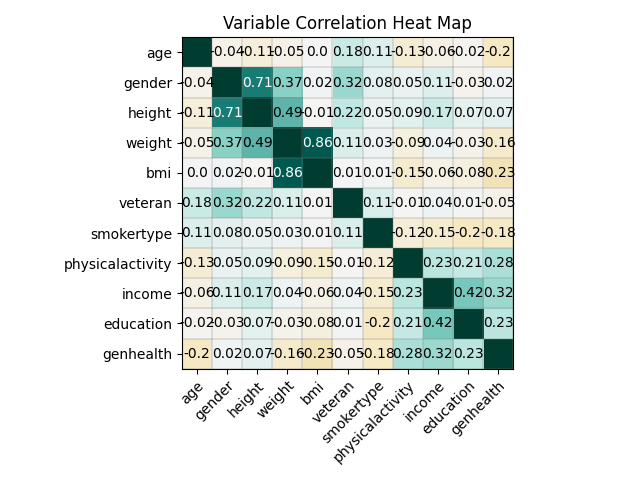

In [12]:
viz.show(probspace=ps2, targetSpec=['age', 'gender', 'height', 'weight', 'bmi', 'veteran', 'smokertype', 'physicalactivity', 'income', 'education', 'genhealth'],
         condSpec=[], filtSpec=[], gtype='hmap', enhance=True, power= 0)

Viz.show: Target =  [('age',), ('gender',), ('height',), ('weight',), ('bmi',), ('veteran',), ('smokertype',), ('physicalactivity',), ('income',), ('education',), ('genhealth',)] , Condition =  []
Viz.show: Showing graph =  Variable Dependence Heatmap , power =  5
Heatmap.show: Showing dependence between variables with sensitivity =  5 .
  Values near 1.0 indicate strong dependence.  Values near 0.0 indicate strong independence.
  Values near .5 are indeterminate.


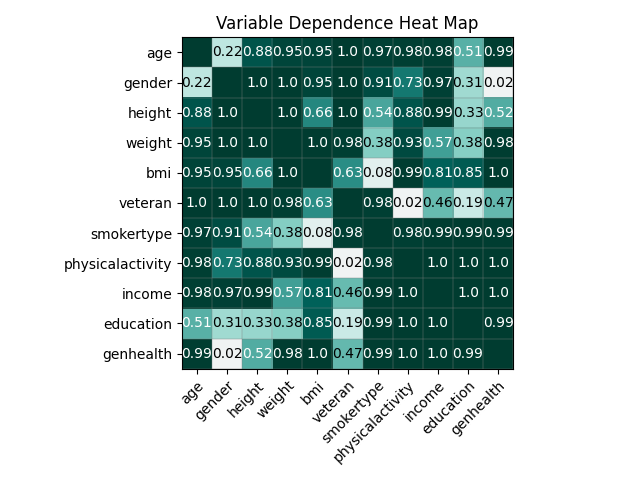

In [85]:
viz.show(probspace=ps2, targetSpec=['age', 'gender', 'height', 'weight', 'bmi', 'veteran', 'smokertype', 'physicalactivity', 'income', 'education', 'genhealth'],
         condSpec=[], filtSpec=[], gtype='hmap', enhance=True, power= 5)

Viz.show: Target =  [('age',), ('arthritis',), ('asthma',), ('bmi',), ('copd',), ('depression',), ('diabetes',), ('gender',), ('genhealth',), ('height',), ('income',), ('kidneydis',), ('othercancer',), ('physicalactivity',), ('skincancer',), ('smokertype',), ('veteran',), ('weight',)] , Condition =  []
Viz.show: Showing graph =  Variable Dependence Heatmap , power =  0
Heatmap.show: Showing Correlation Coefficients (power=0).
  Positive values indicate positive correlation.
  Negative values indicate negative correlation.  Zero indicate no correlation.


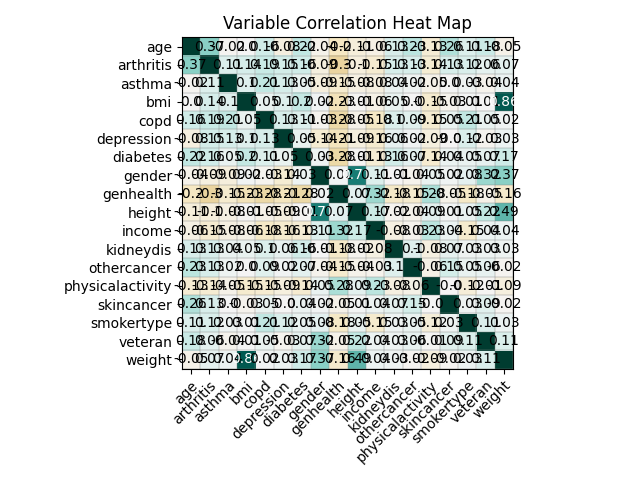

In [5]:
viz.show(probspace=ps2, targetSpec=['age', 'gender', 'height', 'weight', 'bmi', 'income', 'veteran', 'smokertype', 'physicalactivity',
                                    'genhealth', 'arthritis', 'asthma', 'copd', 'diabetes', 'skincancer', 'othercancer', 'kidneydis', 'depression'],
                                     condSpec=[], filtSpec=[], gtype='hmap', enhance=True, power=0)

Viz.show: Target =  [('income',)] , Condition =  [('age',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  30
Elapsed Time =  13.316


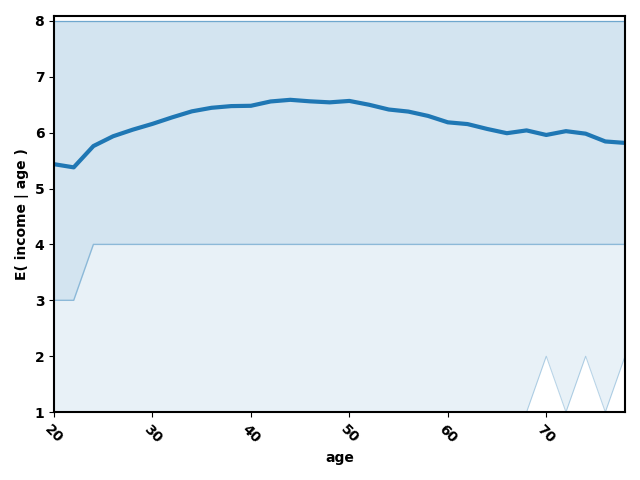

In [43]:
viz.show(probspace=ps2, targetSpec=['income'], condSpec=['age'], controlFor=[], filtSpec=[], gtype='exp', enhance=True)

### Health Factors

Viz.show: Target =  [('genhealth', 3, 4, 5)] , Condition =  [('age',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


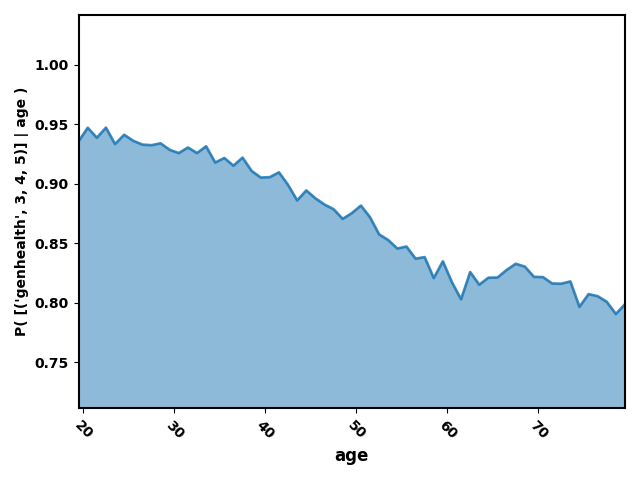

Direction =  0.08170055880854549


In [17]:
viz.show(probspace=ps2, targetSpec=[('genhealth', 3, 4, 5)], condSpec=['age'], controlFor=[], filtSpec=[], gtype='pdf', enhance=True)
print('Direction = ', ps2.testDirection('genhealth', 'age', power=5))

Viz.show: Target =  [('genhealth', 3, 4, 5)] , Condition =  [('income',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  2.559


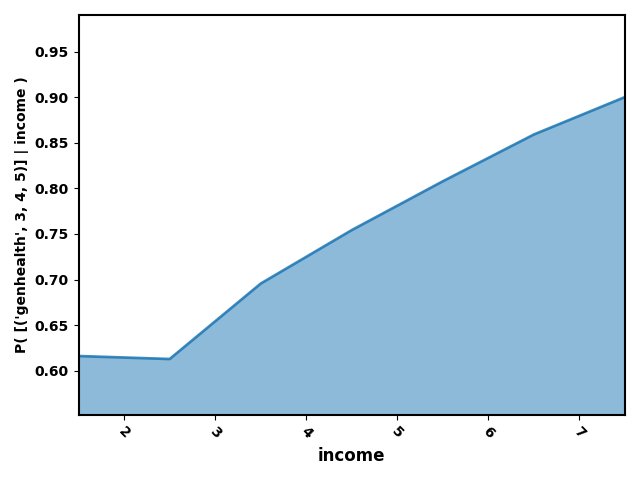

Direction =  0.05804970857979848


In [18]:
viz.show(probspace=ps2, targetSpec=[('genhealth', 3, 4, 5)], condSpec=['income'], controlFor=[], filtSpec=[], gtype='pdf', enhance=True)
print('Direction = ', ps2.testDirection('genhealth', 'income', power=5))

Viz.show: Target =  [('genhealth', 3, 4, 5)] , Condition =  [('age',), ('income',)]
Viz.show: Showing graph =  3D Bound Probability plot with 2 conditionals. , power =  None
enhance =  True
numRecs =  285103
Samples per dimension =  23
nTests =  210
Test Time =  0.002


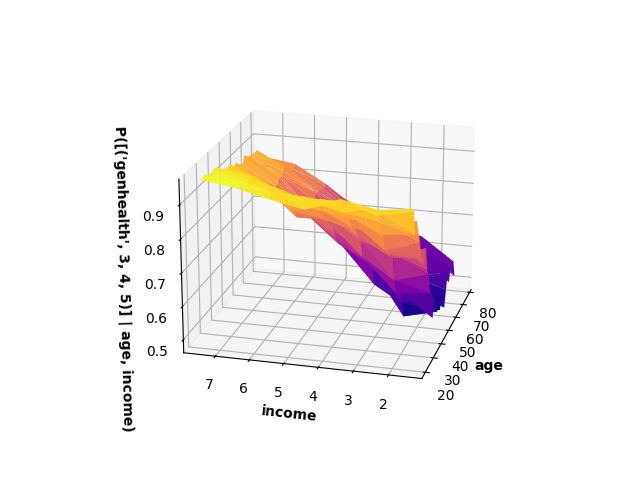

In [20]:
viz.show(probspace=ps2, targetSpec=[('genhealth', 3, 4, 5)], condSpec=['age', 'income'], controlFor=[], filtSpec=[], gtype='pdf', enhance=True)

Viz.show: Target =  [('genhealth', 3, 4, 5)] , Condition =  [('education',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Viz.show: Controlling for  ['income']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


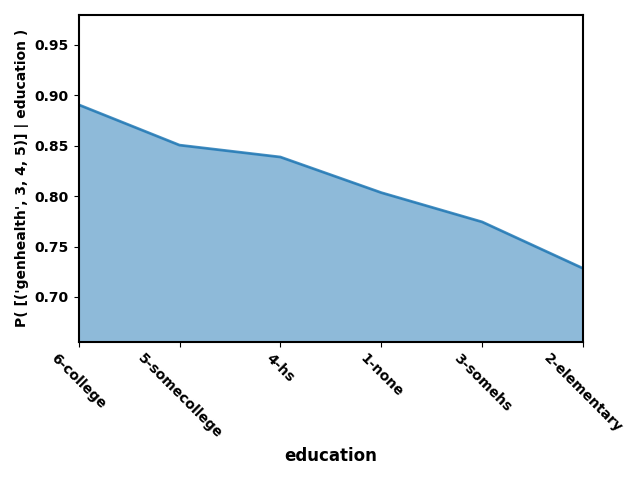

In [29]:

viz.show(probspace=ps2, targetSpec=[('genhealth', 3, 4, 5)], condSpec=['education'], controlFor=['income'], filtSpec=[], gtype='pdf', enhance=True)

Viz.show: Target =  [('genhealth', 3, 4, 5)] , Condition =  [('physicalactivity',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Viz.show: Controlling for  ['age']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  8.561


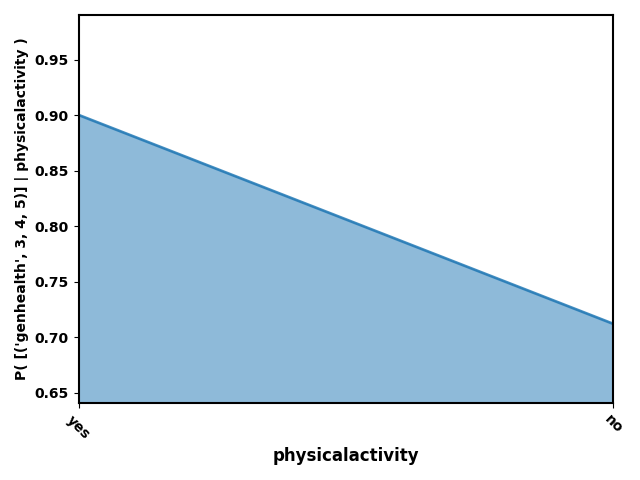

In [30]:
viz.show(probspace=ps2, targetSpec=[('genhealth', 3, 4, 5)], condSpec=['physicalactivity'], controlFor=['age'], filtSpec=[], gtype='pdf', enhance=True)

### What is the healthiest state?

Viz.show: Target =  [('genhealth', 3, 4, 5)] , Condition =  [('state',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  17.719


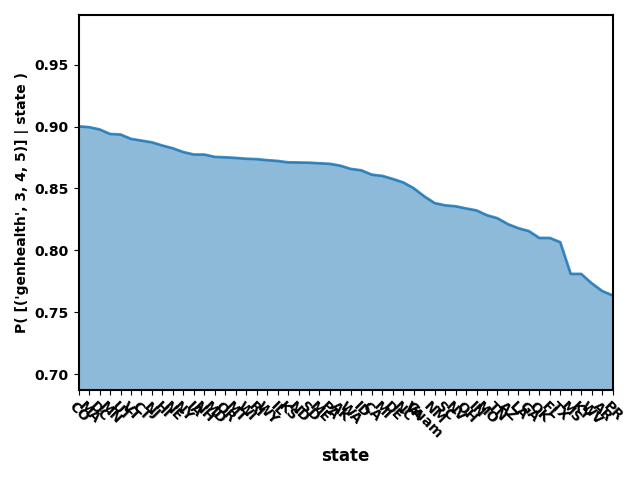

In [32]:
viz.show(probspace=ps2, targetSpec=[('genhealth', 3, 4, 5)], condSpec=['state'], controlFor=[], filtSpec=[], gtype='pdf', enhance=True)

Viz.show: Target =  [('genhealth', 3, 4, 5)] , Condition =  [('state',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Viz.show: Controlling for  ['age', 'income']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  0.0


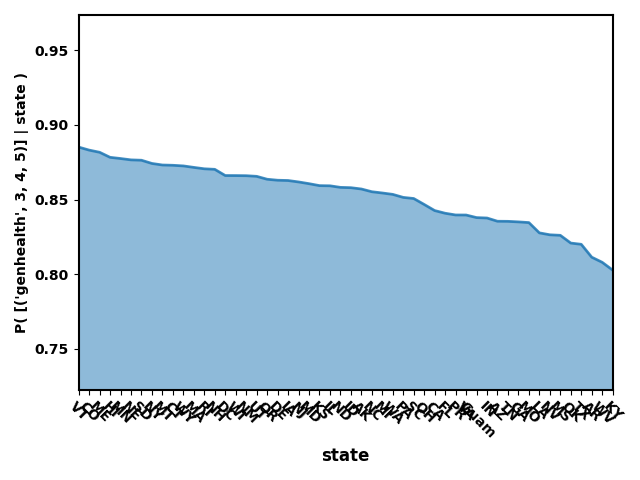

In [35]:
viz.show(probspace=ps2, targetSpec=[('genhealth', 3, 4, 5)], condSpec=['state'], controlFor=['age', 'income'], filtSpec=[], gtype='pdf', enhance=True)

Viz.show: Target =  [('physicalactivity', 'yes')] , Condition =  [('state',)]
Viz.show: Showing graph =  2D Bound Probability plot with 1 conditional. , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  35
Test Time =  19.586


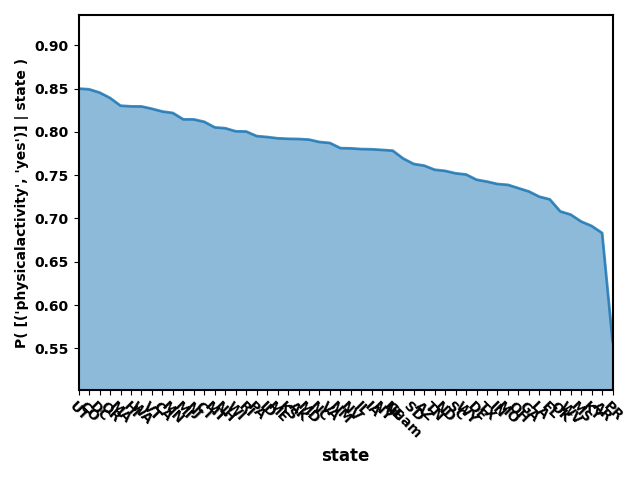

In [44]:
viz.show(probspace=ps2, targetSpec=[('physicalactivity', 'yes')], condSpec=['state'], controlFor=[], filtSpec=[], gtype='pdf', enhance=True)

Viz.show: Target =  [('income',)] , Condition =  [('height',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  30
Elapsed Time =  10.762


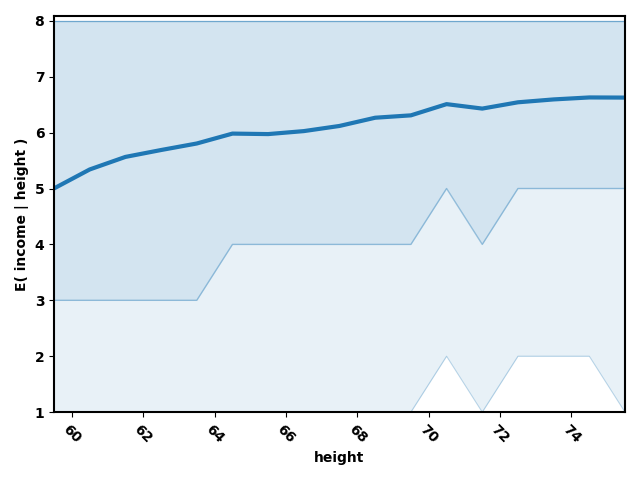

In [51]:
viz.show(probspace=ps2, targetSpec=['income'], condSpec=['height'], controlFor=[], gtype='exp', enhance=True)

Viz.show: Target =  [('income',)] , Condition =  [('height',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Viz.show: Controlling for  ['gender']
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  30
Elapsed Time =  5.709


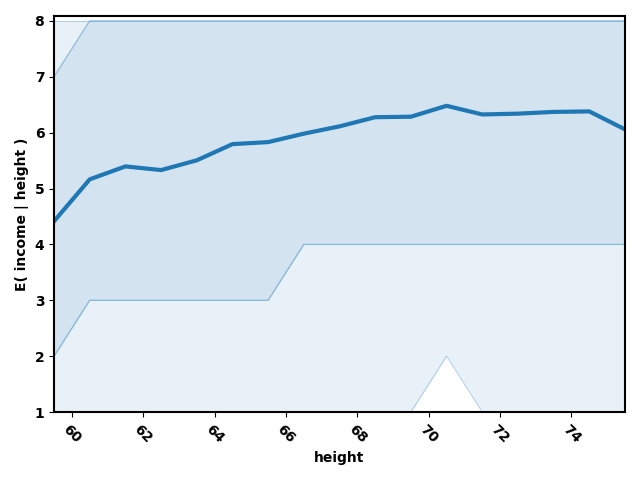

In [58]:
viz.show(probspace=ps2, targetSpec=['income'], condSpec=['height'], controlFor=['gender'], gtype='exp', enhance=True)

### Causal Analysis

Map = 
   height --> weight ( 0.491 )
   income --> genhealth ( 0.321 )
   income --> height ( 0.172 )
   weight --> genhealth ( -0.163 )
Elapsed =  1.0


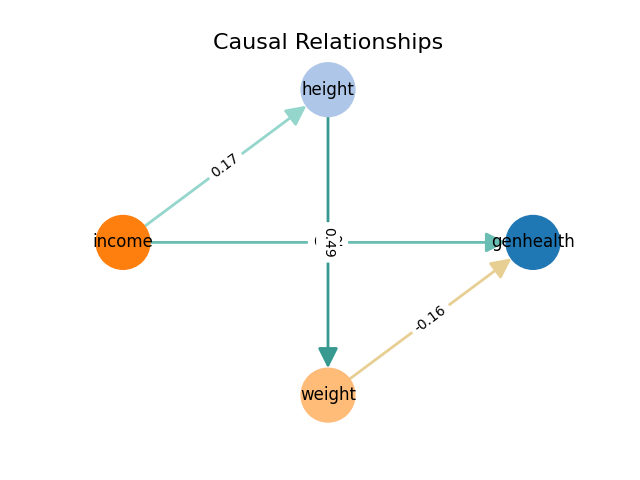

Model score = 0.8522727272727273


In [72]:
from because.visualization import cmodel
cg = cdisc.discover(ps=ps0, varNames=['income', 'height', 'weight', 'genhealth'],
        power=5, sensitivity=6, maxLevel=3, verbosity=1)
cmodel.show(cg=cg, edgeLabels='mde')
print('Model score =', cg.TestModel(order=3, power=5, sensitivity=7, testDirections=False, verbosity=0)[0])


Map = 
   age --> genhealth ( -0.197 )
   age --> income ( -0.063 )
   age --> weight ( -0.049 )
   education --> physicalactivity ( 0.211 )
   gender --> height ( 0.705 )
   genhealth --> physicalactivity ( 0.283 )
   height --> weight ( 0.491 )
   income --> education ( 0.421 )
   income --> genhealth ( 0.321 )
   income --> height ( 0.172 )
   income --> physicalactivity ( 0.235 )
   physicalactivity --> genhealth ( 0.283 )
   physicalactivity --> education ( 0.211 )
   weight --> genhealth ( -0.163 )
Elapsed =  3.0


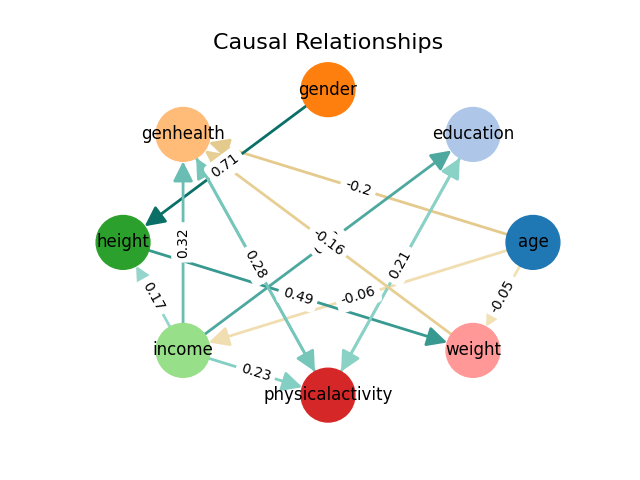

Model score = 0.6628035256113017


In [73]:
from because.visualization import cmodel
cg = cdisc.discover(ps=ps0, varNames=['income', 'height', 'weight', 'genhealth', 'education', 'gender', 'physicalactivity', 'age'],
        power=5, sensitivity=6, maxLevel=3, verbosity=1)
cmodel.show(cg=cg, edgeLabels='mde')
print('Model score =', cg.TestModel(order=3, power=5, sensitivity=6, testDirections=False, verbosity=0)[0])
#cmodel.show(probspace=ps0, targetSpec=['income', 'height', 'weight', 'genhealth', 'education', 'gender', 'physicalactivity', 'age'],
#            power=5, sensitivity=6, verbosity=0, maxLevel=3)

Map = 
   age --> veteran ( 0.185 )
   age --> genhealth ( -0.197 )
   age --> height ( -0.109 )
   age --> income ( -0.063 )
   bmi --> age ( 0.003 )
   bmi --> gender ( 0.021 )
   bmi --> genhealth ( -0.23 )
   bmi --> physicalactivity ( -0.153 )
   bmi --> weight ( 0.855 )
   education --> genhealth ( 0.232 )
   education --> income ( 0.421 )
   education --> physicalactivity ( 0.211 )
   education --> smokertype ( -0.202 )
   gender --> height ( 0.705 )
   gender --> veteran ( 0.322 )
   genhealth --> physicalactivity ( 0.283 )
   genhealth --> education ( 0.232 )
   height --> age ( -0.109 )
   height --> weight ( 0.491 )
   income --> genhealth ( 0.321 )
   income --> height ( 0.172 )
   income --> physicalactivity ( 0.235 )
   physicalactivity --> age ( -0.126 )
   physicalactivity --> genhealth ( 0.283 )
   physicalactivity --> income ( 0.235 )
   physicalactivity --> bmi ( -0.153 )
   physicalactivity --> education ( 0.211 )
   physicalactivity --> smokertype ( -0.117 )
   smo

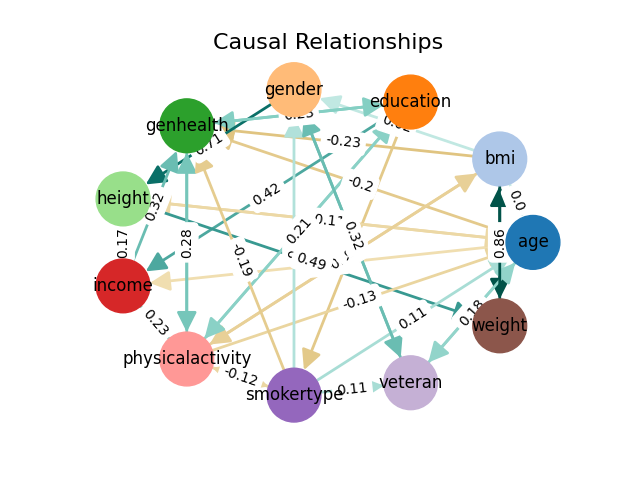

Model score = 0.6826295083343222


In [71]:
from because.visualization import cmodel
cg = cdisc.discover(ps=ps0, varNames=['age', 'gender', 'height', 'weight', 'bmi', 'veteran', 'smokertype', 'physicalactivity', 'income', 'education', 'genhealth'],
        power=5, sensitivity=7, maxLevel=3, verbosity=1)
cmodel.show(cg=cg)
print('Model score =', cg.TestModel(order=3, power=5, sensitivity=7, testDirections=False, verbosity=0)[0])


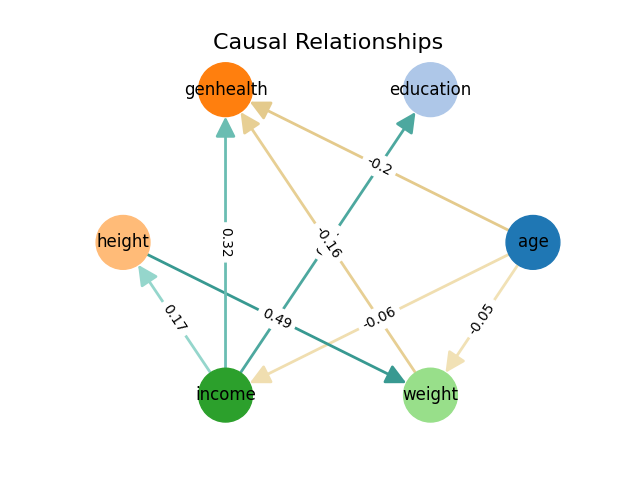

Model score = 0.9445449645826918
MCE age -> education =  0.14267806883821307
MDE age -> education =  0.1431535725132928



In [48]:
from because.causality import cdisc
from because.visualization import cmodel
cg = cdisc.discover(ps=ps0, varNames=['income', 'height', 'weight', 'genhealth', 'age', 'education'], power=5, sensitivity=5.5, maxLevel=3, verbosity=1)
cmodel.show(cg=cg, power=5, sensitivity=6, verbosity=0, maxLevel=3)
print('Model score =', cg.TestModel(order=3, power=5, sensitivity=6, testDirections=False, verbosity=0)[0])
print('MCE age -> education = ', cg.MCE('age', 'education', verbosity=0))
print('MDE age -> education = ', cg.MDE('age', 'education', verbosity=0))
print()

Reversing Link: income --> education


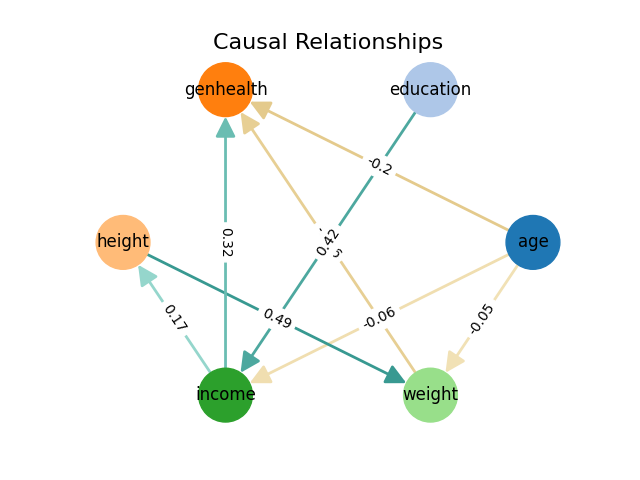

Model score = 0.6763822115384616


In [49]:
reversals = [('income', 'height'), ('income', 'education')][1:]
for r in reversals:
    cg.reverseLink(r[0], r[1])
    print('Reversing Link:', r[0], '-->', r[1])

cmodel.show(cg=cg, power=5, sensitivity=6, verbosity=0, maxLevel=3)

print('Model score =', cg.TestModel(order=3, power=5, sensitivity=6, testDirections=False, verbosity=0)[0])

# Put things back
for r in reversals:
    cg.reverseLink(r[1], r[0])
